<a href="https://colab.research.google.com/github/aybartas/DiseasePredictionWebApp/blob/master/sdsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
data = pd.read_excel('sdsp_patients.xlsx')

In [3]:
data.dtypes

Disease        object
Feature_1      object
Feature_2     float64
Feature_3      object
Feature_4     float64
Feature_5     float64
Feature_6      object
Feature_7      object
Feature_8      object
Feature_9      object
Feature_10     object
Feature_11     object
Feature_12     object
Feature_13     object
Feature_14     object
Feature_15     object
Feature_16     object
Feature_17     object
Feature_18     object
Feature_19     object
Feature_20     object
Feature_21     object
Feature_22     object
Feature_23     object
Feature_24     object
Feature_25     object
Feature_26     object
Feature_27     object
Feature_28     object
Feature_29     object
Feature_30     object
Feature_31     object
Feature_32     object
Feature_33     object
Feature_34     object
Feature_35     object
Feature_36     object
Feature_37     object
Feature_38     object
Feature_39     object
Feature_40     object
Feature_41     object
Feature_42     object
Feature_43     object
Feature_44      int64
Feature_45

In [4]:
data.info

<bound method DataFrame.info of        Disease Feature_1  Feature_2  ... Feature_48  Feature_49  Feature_50
0    Disease_1      Male       28.0  ...         No          No          No
1    Disease_1      Male       18.0  ...         No          No          No
2    Disease_1      Male       44.0  ...         No          No          No
3    Disease_1      Male       19.0  ...         No          No          No
4    Disease_1      Male       17.5  ...         No         Yes          No
..         ...       ...        ...  ...        ...         ...         ...
395  Disease_1    Female       36.0  ...         No          No          No
396  Disease_1      Male       60.0  ...         No          No          No
397  Disease_1    Female       41.0  ...         No          No          No
398  Disease_1      Male       37.0  ...         No          No          No
399  Disease_1      Male       30.0  ...         No          No          No

[400 rows x 51 columns]>

In [5]:
data.head()

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Every Day,No Difference,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Every Day,Evenings,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Every Day,No Difference,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,Every Day,Evenings,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Every Day,Evenings,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,0,No,No,No,No,Yes,No


In [6]:
data['Disease'].value_counts()

Disease_1    244
Disease_3     78
Disease_2     52
Disease_4     26
Name: Disease, dtype: int64

In [7]:
data.isnull().sum().sum()

331

So many data lost. NaNs cannot be thrown away. 331/400

In [8]:
data.shape

(400, 51)

In [9]:
# Feature_3 cleaned, converted to numeric from object. missing values filled for Feature_3
print(len(data[data.Feature_3 == ' ']))
data.Feature_3 = pd.to_numeric(data.Feature_3, errors='coerce')
data.Feature_3.fillna(data.Feature_3.mean(), inplace=True)

2


In [10]:
data.describe()

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_44
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.410125,127.770603,108.104000,23.038050,0.457500
std,14.350309,22.472799,49.526425,24.742478,1.547314
min,10.000000,76.000000,12.000000,0.060000,0.000000
25%,18.000000,110.000000,64.500000,6.000000,0.000000
50%,25.525000,127.885302,108.000000,12.000000,0.000000
75%,38.000000,147.000000,144.000000,36.000000,0.000000
max,90.000000,181.000000,213.000000,168.000000,9.000000


In [11]:
data.columns

Index(['Disease', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34',
       'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39',
       'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44',
       'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49',
       'Feature_50'],
      dtype='object')

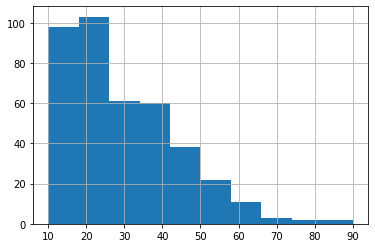

In [12]:
# Age data
data.Feature_2.hist()

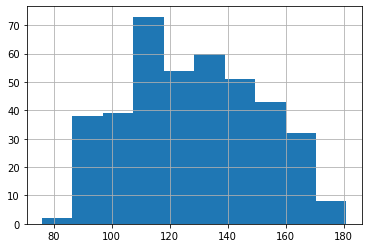

In [13]:
data.Feature_3.hist()

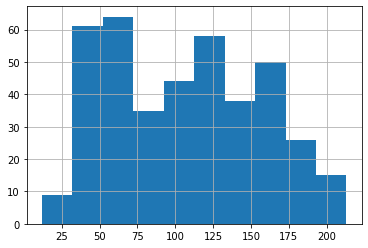

In [14]:
data.Feature_4.hist()

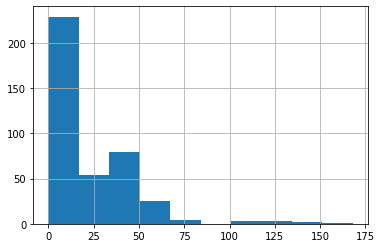

In [15]:
data.Feature_5.hist()

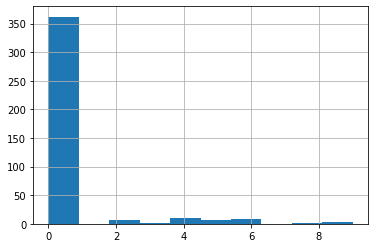

In [16]:
data.Feature_44.hist()

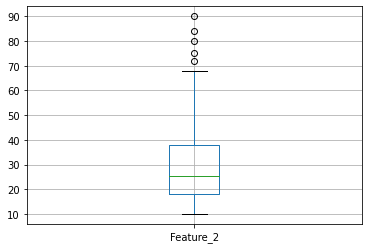

In [17]:
data.boxplot(column= 'Feature_2')

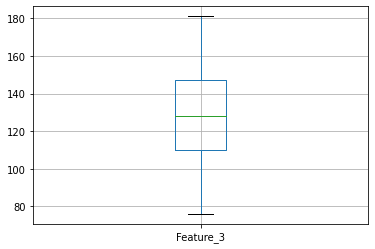

In [18]:
data.boxplot(column= 'Feature_3')

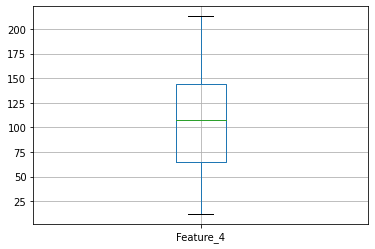

In [19]:
data.boxplot(column= 'Feature_4')

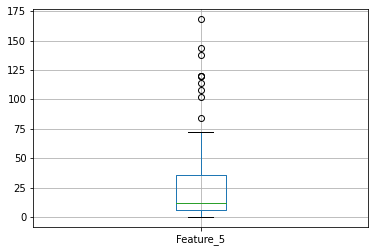

In [20]:
data.boxplot(column= 'Feature_5')

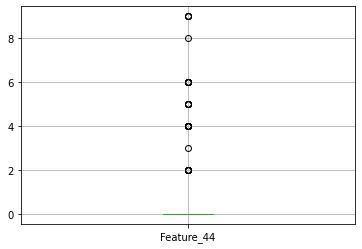

In [21]:
data.boxplot(column= 'Feature_44')

In [22]:
data_numeric = pd.get_dummies(data, columns= ['Feature_1', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50'], drop_first=True)

In [23]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Disease                     400 non-null    object 
 1   Feature_2                   400 non-null    float64
 2   Feature_3                   400 non-null    float64
 3   Feature_4                   400 non-null    float64
 4   Feature_5                   400 non-null    float64
 5   Feature_44                  400 non-null    int64  
 6   Feature_1_Male              400 non-null    uint8  
 7   Feature_6_Yes               400 non-null    uint8  
 8   Feature_7_Yes               400 non-null    uint8  
 9   Feature_8_Yes               400 non-null    uint8  
 10  Feature_9_Yes               400 non-null    uint8  
 11  Feature_10_Yes              400 non-null    uint8  
 12  Feature_11_Yes              400 non-null    uint8  
 13  Feature_12_Yes              400 non

In [24]:
data_numeric.dtypes

Disease                        object
Feature_2                     float64
Feature_3                     float64
Feature_4                     float64
Feature_5                     float64
Feature_44                      int64
Feature_1_Male                  uint8
Feature_6_Yes                   uint8
Feature_7_Yes                   uint8
Feature_8_Yes                   uint8
Feature_9_Yes                   uint8
Feature_10_Yes                  uint8
Feature_11_Yes                  uint8
Feature_12_Yes                  uint8
Feature_13_Yes                  uint8
Feature_14_Yes                  uint8
Feature_15_Yes                  uint8
Feature_17_Yes                  uint8
Feature_18_Yes                  uint8
Feature_20_Yes                  uint8
Feature_21_Yes                  uint8
Feature_22_Yes                  uint8
Feature_23_Yes                  uint8
Feature_24_Yes                  uint8
Feature_26_Yes                  uint8
Feature_27_Yes                  uint8
Feature_28_1

In [25]:
X = data_numeric.iloc[:, 1:]
X.shape

(400, 54)

In [26]:
y = data_numeric.iloc[:, 0]
y.shape

(400,)

ExtraTreesClassifier() creates a model that calculates the importance of features.

In [27]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[1.15661098e-02 9.34844123e-03 1.32662097e-02 2.64068062e-02
 3.17233377e-03 3.63987593e-03 2.41446013e-02 1.61551553e-02
 3.17680610e-03 8.11267272e-03 1.78216260e-03 4.07161081e-03
 5.95244241e-04 3.27834349e-03 3.94979457e-04 1.54651524e-03
 1.69066065e-04 1.01002381e-03 6.73597257e-04 6.21347640e-04
 5.62306976e-03 1.00304422e-03 0.00000000e+00 4.39560440e-05
 3.80410271e-02 4.08141274e-03 5.56469974e-03 3.54390981e-02
 3.44210178e-02 4.29893717e-02 2.69219591e-02 2.72997739e-02
 1.12009401e-02 4.22852832e-02 7.84606955e-03 1.38618699e-02
 2.27695469e-02 1.27128693e-01 1.81073103e-03 7.89515193e-02
 1.88076542e-02 6.08385677e-02 4.96130830e-03 1.46216862e-01
 1.78071858e-03 3.41570312e-03 6.10501095e-03 3.91685903e-03
 8.14768526e-03 5.85478194e-03 2.77892805e-03 1.72874833e-03
 4.17211968e-02 3.33109896e-02]


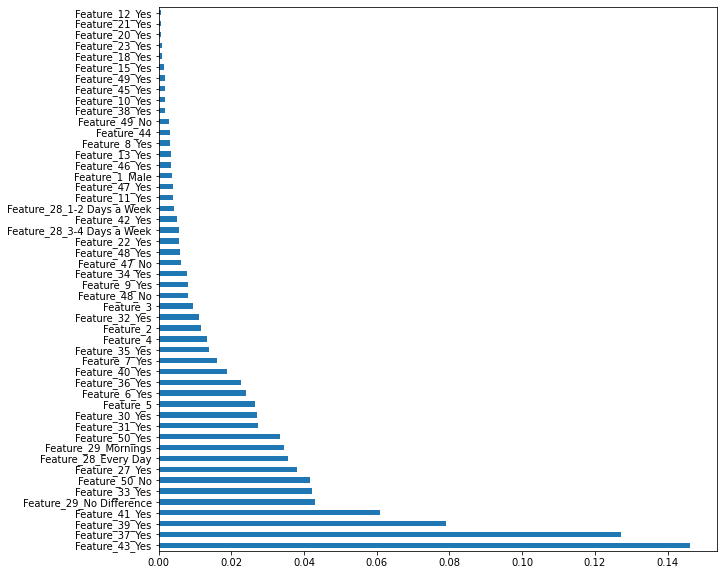

In [28]:
plt.figure(figsize=(10, 10))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(50).plot(kind='barh')
plt.show()

Below, I used the ANOVA feature selector. k value is assigned as 26. The results show that the features that I get with ANOVA and most important 26 feature match. Therefore, I removed the relatively less important features.

In [29]:
feature_selector = SelectKBest(score_func=f_classif, k=26)
X_selected = feature_selector.fit_transform(X, y)
print(X_selected.shape)
print(X_selected)

(400, 26)
[[130.  96.   2. ...   0.   1.   0.]
 [ 95.  46.   3. ...   0.   1.   0.]
 [152. 150.   1. ...   0.   1.   0.]
 ...
 [147. 156.  60. ...   0.   1.   0.]
 [138. 144. 120. ...   0.   1.   0.]
 [130. 108.   6. ...   0.   1.   0.]]


In [30]:
feature_names = data_numeric.columns

In [31]:
mask = feature_selector.get_support()
important_features = []
for isImportant, feature in zip(mask, feature_names):
    if isImportant:
        important_features.append(feature)

In [32]:
important_features

['Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_1_Male',
 'Feature_6_Yes',
 'Feature_8_Yes',
 'Feature_26_Yes',
 'Feature_27_Yes',
 'Feature_28_3-4 Days a Week',
 'Feature_28_Every Day',
 'Feature_29_Mornings',
 'Feature_29_No Difference',
 'Feature_30_Yes',
 'Feature_32_Yes',
 'Feature_33_Yes',
 'Feature_34_Yes',
 'Feature_35_Yes',
 'Feature_36_Yes',
 'Feature_38_Yes',
 'Feature_39_Yes',
 'Feature_40_Yes',
 'Feature_42_Yes',
 'Feature_47_Yes',
 'Feature_48_No',
 'Feature_49_Yes',
 'Feature_50_No']

In [33]:
extracted_data = data_numeric.loc[:, ['Disease', *important_features]]

In [34]:
extracted_data

,Disease,Feature_2,Feature_3,Feature_4,Feature_1_Male,Feature_6_Yes,Feature_8_Yes,Feature_26_Yes,Feature_27_Yes,Feature_28_3-4 Days a Week,Feature_28_Every Day,Feature_29_Mornings,Feature_29_No Difference,Feature_30_Yes,Feature_32_Yes,Feature_33_Yes,Feature_34_Yes,Feature_35_Yes,Feature_36_Yes,Feature_38_Yes,Feature_39_Yes,Feature_40_Yes,Feature_42_Yes,Feature_47_Yes,Feature_48_No,Feature_49_Yes,Feature_50_No
0,Disease_1,28.0,130.0,96.0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,Disease_1,18.0,95.0,46.0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1
2,Disease_1,44.0,152.0,150.0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1
3,Disease_1,19.0,112.0,66.0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,1
4,Disease_1,17.5,105.5,54.0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Disease_1,36.0,142.0,144.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
396,Disease_1,60.0,172.0,165.0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1
397,Disease_1,41.0,147.0,156.0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1
398,Disease_1,37.0,138.0,144.0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1


After removing some features with ANOVA and feature importance, I decided to check correlations of features. Previously, ANOVA and feature importance evaluated features with target variable. This time, I am going to evaluate independent features in itself. Below, heatmap shows correlation values for all features with each other.

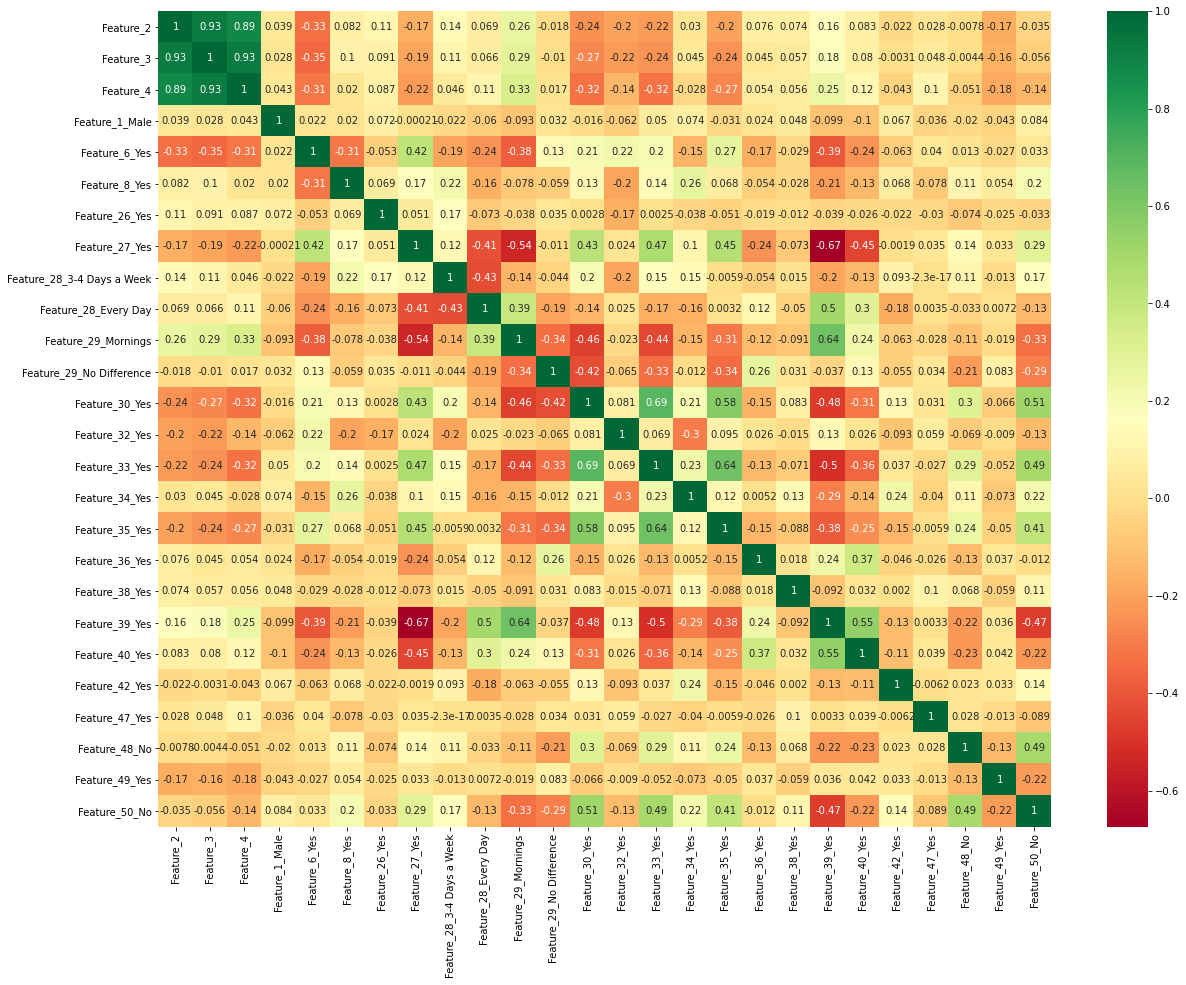

In [35]:
correlation_matrix = extracted_data.corr()
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(20,15))
g=sns.heatmap(extracted_data[top_correlation_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
pd.pivot_table(extracted_data, index='Disease', values=['Feature_2', 'Feature_3', 'Feature_4'])

,Feature_2,Feature_3,Feature_4
Disease,,,
Disease_1,28.045287,125.137175,98.318033
Disease_2,25.307692,121.846154,104.730769
Disease_3,37.737179,142.548341,145.333333
Disease_4,25.442308,120.000000,95.000000
